In [4]:
import pandas as pd
import numpy as np

In [1]:
from gensim.models.ldamodel import LdaModel
from IPython.display import display, HTML

In [31]:
import matplotlib.pyplot as plt

In [50]:
def top_terms_for_member_styled(df, member_name, n=5):
    if member_name in df['full_name'].values:
        # Extract the row for the member and drop 'full_name' column
        member_row = df[df['full_name'] == member_name].drop(['full_name'], axis=1).squeeze()
        # Ensure member_row is a Series and get the top n terms
        top_terms = member_row.nlargest(n)
        # Convert top terms to DataFrame for styling
        top_terms_df = pd.DataFrame(top_terms).reset_index()
        top_terms_df.columns = ['Term', 'Score']
        
        # Apply styling
        styled_df = top_terms_df.style.set_table_styles(
            [{
                'selector': 'th',
                'props': [('font-size', '12pt'), ('text-align', 'center')]
            },
            {
                'selector': 'td',
                'props': [('font-size', '12pt'), ('text-align', 'center')]
            }]
        ).set_properties(**{
            'background-color': 'lavender',
            'color': 'black',
            'border-color': 'darkgray'
        }).applymap(
            lambda x: f'color: {"darkred" if isinstance(x, float) else "black"}'
        ).set_caption(f"Top {n} Terms for {member_name}")

        return styled_df
    else:
        return f"No data for individual: {member_name}"

In [3]:
def get_top_n_terms(df, n=5):
    df_t = df.T
    top_terms = {}
    for faction in df_t.columns:
        top_terms[faction] = df_t[faction].nlargest(n).index.tolist()
    return pd.DataFrame(top_terms)

In [4]:
council_members = [
    'SandraForNY1', 'LincolnRestler', 'BobHoldenNYC', 'OswaldFeliz', 'AdrienneCD28',
    'KalmanYegerNYC', 'DianaAyalaNYC', 'mvelaznyc', 'KevinCRiley', 'CMMercedesCD46',
    'CMCarlinaRivera', 'Lynn4NYC', 'juliej_won', 'PiSanchezNYC', 'GaleBrewerNYC',
    'crystalrhudson', 'voteshekar', 'ChrisMarteNYC', 'NYCCouncil38', 'DarleneMealy55',
    'Salamancajr80', 'AriKagan47', 'OsseChi', 'KamillahMHanks', 'CarlinaRivera',
    'AmandaFariasNYC', 'KeithPowersNYC', 'CMDarleneMealy', 'ShahanaFromBK',
    'InnaVernikov', 'Powers4Queens', 'KalmanYeger', 'FranciscoMoyaNY', 'JimGennaro',
    'alexaforcouncil', 'CMNantashaW', 'JoeBorelliNYC', 'CnDelarosa', 'JustinBrannan',
    'EricDinowitz', 'ShaunAbreu', 'DarleneMealy', 'JulieMenin', 'ebottcher',
    'DMCarr', 'JoannAriola32', 'galeabrewer', 'FarahNLouis',
    'CMShekarK', 'CMRitaJoseph', 'CouncilwomanKrj', 'CMvpaladino', 'CMPiSanchez',
    'CMJenGutierrez', 'cmmvelaz', 'CMbarron2', 'CMSandyNurse', 'CMBrooksPowers',
    'A_StevensD16', 'CMShaunAbreu', 'CMLindaLee', 'CMSandraUng', 'CMCrystalHudson',
    'CMRestler', 'CMChiOsse', 'CMAriKagan47', 'CMJulieWon', 'CabanD22', 'CMDMCarr',
    'CMSalamancaJr', 'CMKevinCRiley', 'CMAmandaFarias', 'EricDinowitzNYC',
    'CMFranciscoMoya', 'NYCCouncilAyala', 'AdrienneToYou', 'NYCSpeakerAdams',
    'CMShahanaHanif', 'VickieforNYC', 'LindaLeeforNYC', 'JenGutierrezNYC',
    'CarmenForNYC', 'SandyforCouncil', 'RitaJosephNYC', 'CMFarahLouis', 'CMBobHoldenNYC',
    'althea4theBX', 'nycpa', 'tiffany_caban'
]

dsa_oponents = ["evie4us","YuLinCD38"]
dsa_losers = ["jaslinforqueens","mike4brooklyn","brandonwestnyc","BxOrganizer"]

In [5]:
name_username = pd.read_csv('../data/name_username.csv')
tweet_df = pd.read_csv('../data/tweet_df.csv')
cop_vader_bert = pd.read_csv('../data/cops_vader_bert.csv')

tfidf_df_rf = pd.read_csv('../data/rf_tfidf_df.csv', index_col=0)
tfidf_df_rf_pca = pd.read_csv('../data/rf_pca_tfidf_df.csv', index_col=0)
housing_tf_df = pd.read_csv('../data/housing_tfidf_df.csv', index_col=0)

In [59]:
party_tf_df = pd.read_csv('../data/party_tfidf_df.csv', index_col=0)
pc_tfidf_df = pd.read_csv('../data/pc_tfidf_df.csv', index_col=0)
ph_tfidf_df = pd.read_csv('../data/ph_tfidf_df.csv', index_col=0)

In [60]:
council_members_only = tweet_df[tweet_df['username'].isin(council_members)]
tweets_per_name = council_members_only.groupby('full_name').size().reset_index(name='tweets_count')

In [8]:
tweets_per_name.columns = ['Council Member', 'Number of Tweets']

styled_df = tweets_per_name.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [
            ('background-color', '#007bff'),
            ('color', 'white'),
            ('font-family', 'Georgia'),
            ('text-align', 'center')
        ]
    },
    {
        'selector': 'td',
        'props': [
            ('text-align', 'center'),
            ('font-family', 'Georgia')
        ]
    }]
).set_properties(**{
    'background-color': 'lavender',
    'color': 'black'
}).set_caption("Tweets per Member")

# City Council Twitter Data

I have collected several datasets of Tweets relevant to the New York City Council. Below is a short exploration of that data and an example of some of the uses it can be put to.

### Council Member Tweets

This twitter dataset is composed of 145,313 tweets beginning in January of 2021 and ending in December of 2023. Of these, 141,807 were authored by members of the 2022-2023 City Council term, the other 3,506 were written by five unsuccessful city council candidates important for analysis, two who lost to DSA members and three DSA members who lost their elections. Tweets by campaign losers range from January of 2021 through hte election in June of that year. Below is a sample of what work can be done with this dataset. At the time of writing, March 2024, more tweets can be easily accessed, but this si liable to change as Twitter (X) updates its terms of service. 

Here is a list of the number of tweets per council member (including public advocate Jumanaae Williams). The mean number of tweets per user in the dataset is 2,727, with a median of 2,535. Some members did not tweet much, which means I will have to lean harder on other methods to cluster them. When they are clustered, other users tweets in their cluster will speak for them, which could cause issues in interpretation. I do not intend to focus explicitly on the election of any of the members who do not tweet much. 

In [9]:
styled_df

,Council Member,Number of Tweets
0,Adrienne E. Adams,3083
1,Alexa Avilés,2214
2,Althea V. Stevens,1756
3,Amanda Farías,2550
4,Ari Kagan,3922
5,Carlina Rivera,3281
6,Carmen N. De La Rosa,2375
7,Charles Barron,49
8,Chi A. Ossé,677
9,Christopher Marte,195


### Types of Analysis 

This data can be put to several uses. Below is a Term Frequency - Inverse Document Frequency (TF-IDF), analysis which examines the terms that makes each council members twitter feed unique. 

For example here is DSA endorsed Tiffany Caban's top 10 terms, with an unsurprising focus on workers, health care, closing Rikers, city services, and "fighting." 

In [10]:
tfidf_df = pd.read_csv('../data/member_tfidf_df.csv')

In [70]:
top_terms_for_member_styled(tfidf_df, 'Tiffany Cabán', 10)

,Term,Score
0,astoria,0.278914
1,safety,0.190188
2,violence,0.144664
3,health,0.138170
4,workers,0.132206
5,care,0.113303
6,fight,0.112292
7,housing,0.107355
8,services,0.106222
9,rikers,0.102111


And at the other end of the ideological spectrum, the top 10 terms for Inna Vernikov, who has eschewed local issues to tweet heavily about the Israel-Palestine conflict. CUNY makes her top 10, but we can assume this is due to allegations of anti-semitism. 

In [72]:
top_terms_for_member_styled(tfidf_df, 'Inna Vernikov', 10)

,Term,Score
0,jewish,0.189668
1,israel,0.172468
2,antisemitism,0.157642
3,endjewhatred,0.129203
4,cuny,0.125338
5,hamas,0.125249
6,brighton,0.122217
7,republican,0.108981
8,school,0.104567
9,nycmayor,0.099932


### Top Terms by Council Faction 

Another way to slice this data is to examine top terms by ideological faction. This is a complicated process with a lot of subjective input, and the one I will continue to put a lot of thought into throughout the dissertation writing process. For the sake of example here, I based the clustering off of Michael Lange's categorization of New York City politicians. Lange is concerned with finding example politicians at all levels of state and ciy government, so he classifies roughly one third of '22-'24 council members. I used his partial classification, in conjunction with council voting history, as a basis for a supervised machine learning approach to classification. The table below is the result of that approach. The first column, "Lange Faction," are his mappings. The other three columns are different methods of classification. Lange's classification system can be found here:

https://www.michaellange.nyc/p/the-seven-factions-of-new-york-city

In [73]:
faction_compare = pd.read_csv('../data/faction_compare.csv')

In [74]:
faction_compare.columns = ['Council Member', 'Lange Faction','Random Forest Prediction','K-Near Neighbors Prediction','Random Forest w/PCA Prediction']
faction_compare.loc[faction_compare['Lange Faction'].isnull(), 'Lange Faction'] = "Not Specified"

faction_table_df = faction_compare.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [
            ('background-color', '#007bff'),
            ('color', 'white'),
            ('font-family', 'Georgia'),
            ('text-align', 'center')
        ]
    },
    {
        'selector': 'td',
        'props': [
            ('text-align', 'center'),
            ('font-family', 'Georgia')
        ]
    }]
).set_properties(**{
    'background-color': 'lavender',
    'color': 'black'
}).set_caption("Tweets per Member")

In [75]:
faction_table_df

,Council Member,Lange Faction,Random Forest Prediction,K-Near Neighbors Prediction,Random Forest w/PCA Prediction
0,Adrienne E. Adams,County Aligned Moderates,County Aligned Moderates,County Aligned Moderates,County Aligned Moderates
1,Alexa Avilés,DSA,DSA,DSA,DSA
2,Althea V. Stevens,Not Specified,Affluent Liberals,Affluent Liberals,Hybrid Progressives
3,Amanda Farías,Not Specified,Affluent Liberals,Affluent Liberals,Affluent Liberals
4,Ari Kagan,Old and New Republicans,Old and New Republicans,Old and New Republicans,Old and New Republicans
5,Carlina Rivera,Hybrid Progressives,Hybrid Progressives,Hybrid Progressives,Hybrid Progressives
6,Carmen N. De La Rosa,Not Specified,Affluent Liberals,Affluent Liberals,Affluent Liberals
7,Charles Barron,Not Specified,DSA,Alphabet Left,Hybrid Progressives
8,Chi A. Ossé,Not Specified,DSA,DSA,Alphabet Left
9,Christopher Marte,Not Specified,Affluent Liberals,Affluent Liberals,Affluent Liberals


Now ideological faction can be treated as a "document" and the top terms for each faction can be determined.This first table shows top words if we use the Random Forest classifier.

In [77]:
term_table = get_top_n_terms(tfidf_df_rf, 10)
styled_term_table = term_table.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#606060'), ('color', 'white')]},  # Header styling
    {'selector': 'td', 'props': [('text-align', 'center')]}  # Cell text alignment
]).set_properties(**{
    'background-color': '#f4f4f4',  # Cell background color
    'color': '#000',  # Cell text color
    'border-color': 'white'  # Border color
})

In [78]:
styled_term_table

,Affluent Liberals,Alphabet Left,County Aligned Moderates,DSA,Hybrid Progressives,Old and New Republicans
0,school,school,communities,workers,workers,school
1,housing,communities,women,housing,park,park
2,health,students,health,park,health,safety
3,park,housing,housing,safety,housing,residents
4,communities,care,black,fight,communities,southern
5,families,workers,safety,sunset,women,students
6,workers,women,southeastqueens,justice,free,nypd
7,free,park,families,health,families,life
8,women,fight,violence,communities,learn,police
9,students,services,workers,care,hearing,nycmayor


In [63]:
term_table = get_top_n_terms(tfidf_df_rf_pca, 10)
styled_term_table = term_table.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#606060'), ('color', 'white')]},  # Header styling
    {'selector': 'td', 'props': [('text-align', 'center')]}  # Cell text alignment
]).set_properties(**{
    'background-color': 'lavender',
    'color': 'black',
    'border-color': 'white'  # Border color
})

And this second if we use the Random Forest Classifier with Principal Component Analysis. 

In [64]:
styled_term_table

,Affluent Liberals,Alphabet Left,County Aligned Moderates,DSA,Hybrid Progressives,Old and New Republicans
0,school,housing,communities,workers,park,school
1,health,communities,women,housing,workers,park
2,free,fight,health,park,women,safety
3,families,park,housing,safety,health,residents
4,park,workers,black,fight,communities,students
5,students,school,safety,sunset,housing,nypd
6,women,care,southeastqueens,justice,families,life
7,housing,justice,families,health,free,police
8,workers,health,violence,care,learn,nycmayor
9,communities,free,workers,communities,fight,free


Housing is obviously a common issues to every faction, which is unsurprising. We assume these factions are talking about housing in a different way and offering diferent solutions. To test this we can pull only tweets that mention housing and see how the terms vary.

In [80]:
term_table = get_top_n_terms(housing_tf_df, 10)
styled_term_table = term_table.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#606060'), ('color', 'white')]},  # Header styling
    {'selector': 'td', 'props': [('text-align', 'center')]}  # Cell text alignment
]).set_properties(**{
    'background-color': '#f4f4f4',  # Cell background color
    'color': '#000',  # Cell text color
    'border-color': 'white'  # Border color
})

In [81]:
styled_term_table

,Affluent Liberals,Alphabet Left,County Aligned Moderates,DSA,Hybrid Progressives,Old and New Republicans
0,housing,housing,housing,housing,housing,parents
1,affordable,affordable,affordable,rent,affordable,housing
2,parents,rent,crisis,parents,tenants,school
3,rent,parents,fair,fight,rent,different
4,currently,crisis,address,nycha,parents,current
5,crisis,tenants,rent,education,nychousing,kids
6,different,fight,framework,justice,different,students
7,school,school,agenda,schools,rights,children
8,current,justice,parents,health,crisis,currently
9,students,schools,safety,affordable,justice,migrants


We see the DSA discussing rent, we might assume placing the housing burden on high rents rather than supply constraints or property tax, as well as the word 'fight.' They are also the only group to include NYCHA. The alphabet left, closest to the DSA ideologically, also uses fight and rent, but no mention of public housing. In the Republican faction we see several words relating to schools and zoning, indicating a discussion of school zones rather than affordability more generally. We also see a discussion of migrants, notable as the wave of migrants became a salient political divide relatively late in the dataset's history. The GOP makes no mention of rent or affordability. 

There is a lot more possibility with this data, both as a group and by analysis of individual council members. As the clustering becomes more accurate the results should be more informative. 

### Parites

I have also built a dataset of the Twitter feeds of official political party accounts as well as prominent party clubs. That dataset is currently 15,067 tweets. In a similar fashion to the party factions above, this dataset can bu used to trace the spectrum of party competition. 

The DSA is set on socialism and words commonly associated with socialist politics. The Dems on teh mechanisms of electoral politics, the GOP on national politics, and the Working Families party seemingly somewhere between the Dems and the DSA. 

In [82]:
term_table = get_top_n_terms(party_tf_df, 10)
styled_term_table = term_table.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#606060'), ('color', 'white')]},  # Header styling
    {'selector': 'td', 'props': [('text-align', 'center')]}  # Cell text alignment
]).set_properties(**{
    'background-color': '#f4f4f4',  # Cell background color
    'color': '#000',  # Cell text color
    'border-color': 'white'  # Border color
})
styled_term_table

,DSA,Dems,GOP,WF
0,workers,candidates,republican,housing
1,taxtherich,democratic,biden,families
2,comrades,meeting,president,mayor
3,fight,election,gop,care
4,socialists,voting,metropolitan,health
5,solidarity,primary,america,votewfp
6,socialist,democracy,democrats,workers
7,power,judicial,trump,candidates
8,union,dems,candidate,communities
9,organizing,endorse,host,adams


Below are the parties top words related to housing:

In [68]:
term_table = get_top_n_terms(ph_tfidf_df, 10)
styled_term_table = term_table.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#606060'), ('color', 'white')]},  # Header styling
    {'selector': 'td', 'props': [('text-align', 'center')]}  # Cell text alignment
]).set_properties(**{
    'background-color': '#f4f4f4',  # Cell background color
    'color': '#000',  # Cell text color
    'border-color': 'white'  # Border color
})
styled_term_table

,DSA,Dems,GOP,WF
0,housing,housing,gop,housing
1,rent,different,different,rent
2,fight,affordable,losers,affordable
3,tenants,voting,mask,goodcause
4,eviction,transparent,yelling,care
5,rents,democratic,democrats,crisis
6,taxtherich,candidate,former,mayor
7,parents,county,leadership,health
8,cancelrent,candidates,alone,adams
9,comrades,endorsed,american,tenants


And policing: 

In [69]:
term_table = get_top_n_terms(pc_tfidf_df, 10)
styled_term_table = term_table.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#606060'), ('color', 'white')]},  # Header styling
    {'selector': 'td', 'props': [('text-align', 'center')]}  # Cell text alignment
]).set_properties(**{
    'background-color': '#f4f4f4',  # Cell background color
    'color': '#000',  # Cell text color
    'border-color': 'white'  # Border color
})
styled_term_table

,DSA,Dems,GOP,WF
0,police,changethenypd,nypd,police
1,cops,nypd,fdny,nypd
2,nypd,enricopurita,police,violence
3,defundnypd,judicial,bless,resources
4,nycdsarjwg,police,god,mayor
5,adams,accountable,shooting,adams
6,schools,east,nycpba,housing
7,services,meeting,responders,mental
8,campaign,candidate,officer,communities
9,cop,elected,neverforget,safety


### Sentiment Analysis

Another possibility with these tweets is sentiment analysis. There are many established approaches to sentiment analysis with social media data, and many directions to go with all of the tweets available here.

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
cop_tweets = cop_vader_bert.copy()

In [65]:
cop_tweets = cop_tweets.merge(name_username, on='username')

One possible application is to pull out all tweets on a certain topic and look at how different groups discuss these tweets, or to look at how the sentiment towards the topic have shifted over time. Below I have pulled every tweet from the dataset that mentions "police", "cops", or "nypd." I have then run a few example analyses. 

The two forms of sentiment analysis I have run are VADER (Valence Aware Dictionary and Sentiment Reasoner), a commonly used sentiment analysis library trained for social media, and BERTweet, a sentiment analysis tool built on BERT (Bidirectional Encoder Representations from Transformers), a transformer based deep learning approach developed by Google, capable of understanding more nuance in text. Both assign "Positive," "Negative," and "Neutral" to each tweet. Vader also assigns a numeric score ranging from -1 to 1 to describe the sentiment and BERT assigns a confidence score to its assessment.

Below is a chart comparing the classification of BERT and VADER. The models agree on 3,358 tweets and disagree on 2,167 tweets. On only 605 tweets were the sentiment scores opposite. 

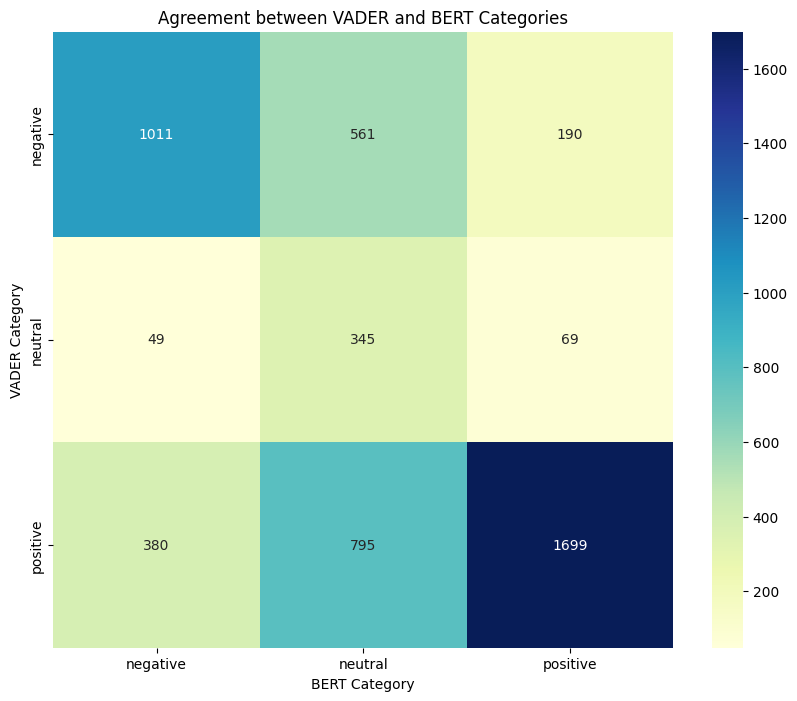

In [93]:
cop_tweets['agreement'] = cop_tweets['vader_sentiment_category'] == cop_tweets['bert_sentiment_category']
agreement_table = pd.crosstab(cop_tweets['vader_sentiment_category'],  cop_tweets['bert_sentiment_category'])

plt.figure(figsize=(10, 8))
sns.heatmap(agreement_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Agreement between VADER and BERT Categories')
plt.ylabel('VADER Category')
plt.xlabel('BERT Category')
plt.show()

There are some definite problems, as a quick review of tweet classification makes clear. For example Crystal Hudson's tweet "So thankful for your leadership in Repealing the WalkingWhileTrans ban is a win for Marsha Sylvia Layleen and all of our trans sisters who have been harassed and violated by the police for simply existing in public" was correctly marked as negative by VADER but classified as positive by BERT. A tweet by Carlina Rivera on sexual misconduct by the NYPD was reported as positive by VADER and neutral by BERT, presumably because she was lauding the actions of the Civilian Complaint Review Board on the matter. I will continue to tweak these models, though it may turn out that a supervised model in which I manually classify some tweets and teach the model to seek out others like them may be more beneficial. I have currently built a model on a small training set of these tweets that can predict an anti-NYPD tweet with 88% accuracy. 

We can track the sentiment of the tweets that use these words over time. There are small spikes in the sentiment of police tweets in July of 2021, 2022, and 2023. Perhaps council members are tweeting about more summer public events in which the police play a role, or perhaps they are responding to a summer uptick in crime. Once the sentiment model is better tuned I can begin a more granular analysis of these shift. 

In [94]:
cop_tweets['date'] = pd.to_datetime(cop_tweets['date'])
df = cop_tweets.set_index('date')
monthly_scores = df['vader_sentiment_score'].resample('M').mean()

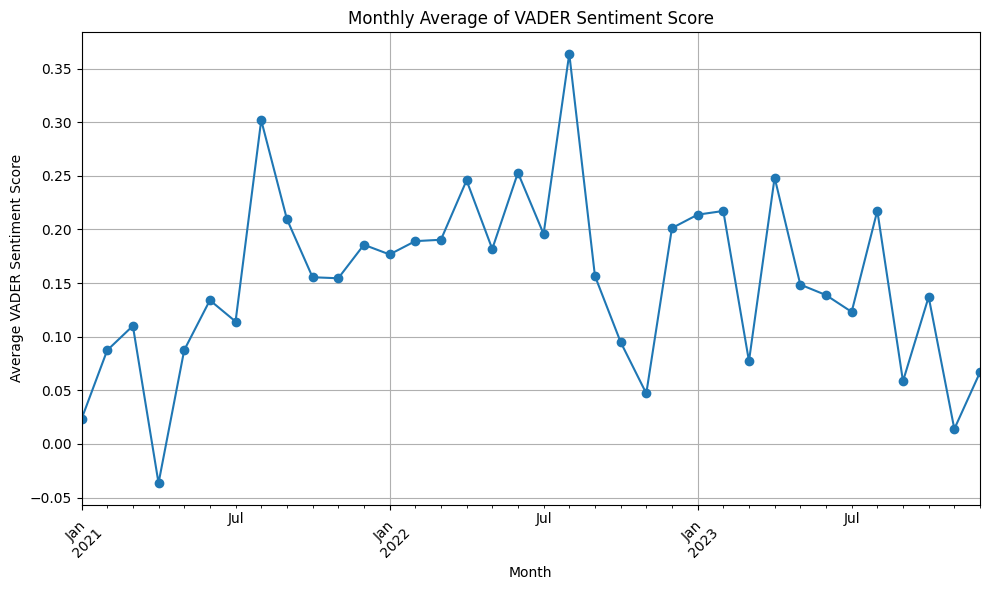

In [95]:
plt.figure(figsize=(10, 6))
monthly_scores.plot(marker='o', linestyle='-')
plt.title('Monthly Average of VADER Sentiment Score')
plt.xlabel('Month')
plt.ylabel('Average VADER Sentiment Score')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### LDA

The Tweets can also be used for topic modeling. Below is an example of a Latent Dirichlet Allocation (LDA). This unsupervised learning technique treats every tweet as a document and groups them into a preset number of topics. Below is an example of 10 topics drawn from the City Council data set. The LDA model can accept an enormous amount of fine tuning, so the topics can be further tweaked to and specified.

In [2]:
model_path = "../models/lda/cc_lda_model"
lda_model = LdaModel.load(model_path)

In [6]:
lda_tweets = pd.read_csv('../data/tweet_with_lsa.csv')

In [7]:
top_n_words = 10
topics = lda_model.show_topics(num_topics=-1, num_words=top_n_words, formatted=False)

In [9]:
html_table = '<table><tr><th>Topic</th><th>Top Words</th></tr>'

for topic_number, topic in topics:
    top_words = ', '.join([word for word, _ in topic])
    html_table += f'<tr><td>Topic {topic_number}</td><td>{top_words}</td></tr>'

html_table += '</table>'

In [10]:
display(HTML(html_table))

Topic,Top Words
Topic 0,"nypd, police, rikers, officers, clear, left, could, ago, think, without"
Topic 1,"workers, housing, access, care, fight, bill, rights, ensure, deserve, fair"
Topic 2,"watch, meeting, full, festival, parents, live, read, happening, supplies, fire"
Topic 3,"never, women, honored, violence, endorsement, lives, history, world, black, congratulations"
Topic 4,"best, birthday, even, better, wait, voters, thanksgiving, friend, days, away"
Topic 5,"communities, safety, crisis, health, advocate, climate, justice, elected, change, future"
Topic 6,"school, students, staff, schools, amazing, center, families, news, president, children"
Topic 7,"election, early, voting, lost, congrats, jewish, campaign, site, find, hate"
Topic 8,"covid, free, small, business, learn, register, businesses, assistance, information, rsvp"
Topic 9,"park, night, stay, contact, food, flooding, wishing, rain, beautiful, weekend"


Some topics are clearer than others. Topic 0 (Python indexing always starts with 0) is clearly about the NYPD and topic 1 is is about housing access and workers rights. Topic 3 appears to be primarily about gender issues, topic 6 on schools, etc. As mentioned above, LDA offers a lot of room for small adjustments. I can also include the other Twitter datasets to try and get a clearer sense of the topics. 

In [14]:
lda_tweets = lda_tweets.dropna(subset=['full_name'])

In [21]:
topic_1_df = lda_tweets[lda_tweets['topic'] == 1].groupby('full_name').size().reset_index(name='tweet_count')
topic_1_df.sort_values('tweet_count', ascending=False, inplace=True)
topic_1_df = topic_1_df.head(5)

If we look at what council members tweeted most often about topic 1, we see a DSA endorsed member and the DSA endorsed Public Advocate, the DSA adjacent Shahana Hanif, reliably liberal Rita Joseph, and Justin Brennan who is somewhat of a wild card. 

In [22]:
html_table = topic_1_df.to_html(index=False)
display(HTML(html_table))

full_name,tweet_count
Shahana K. Hanif,1031
Justin L. Brannan,919
Jumanaae Williams,688
Rita C. Joseph,647
Alexa Avilés,612


In [36]:
topic_0_df = lda_tweets[lda_tweets['topic'] == 0]

In [38]:
topic_0_df.loc[:, 'date'] = pd.to_datetime(topic_0_df['date'])

In [28]:
topic_0_df.set_index('date', inplace=True)
monthly_counts = topic_0_df.resample('M').size()

If we plot the topic that seems to be about the NYPD and Rikers over time, it appears that things stay in the 800-1,000 range before the Democratic primary in June, and then they drop off with another spike around January of 2022, perhaps related to the two officers shot and killed in a Harlem apartment that month. 

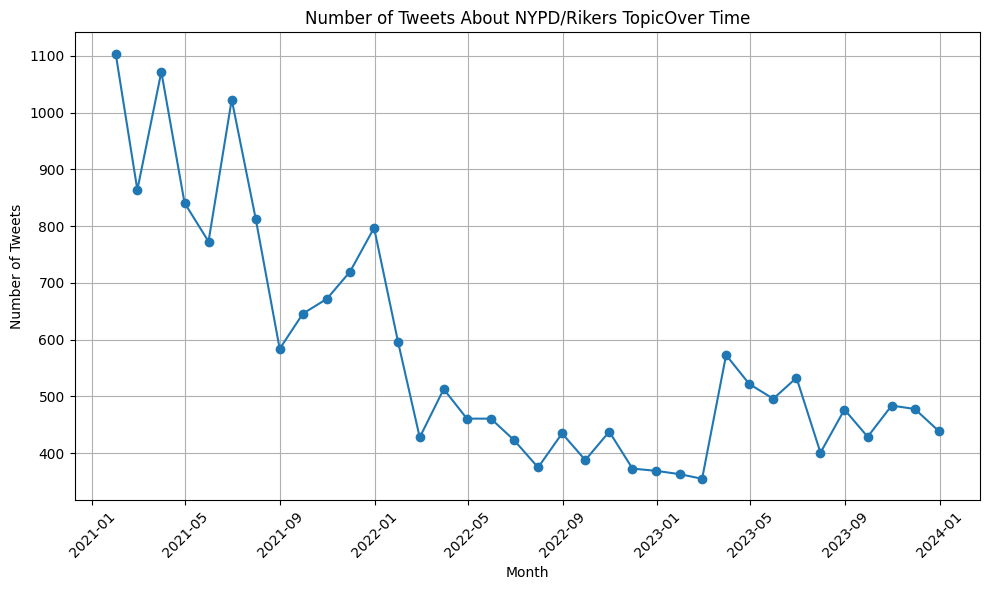

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts.index, monthly_counts, marker='o', linestyle='-')
plt.title('Number of Tweets About NYPD/Rikers Topic Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  
plt.show()

These LDA topics can be incorporated into all the methods specified above. We can look at how different factions talk about topics over time, which factions talk about which topics more, use the topics to assist in clustering, look at how candidates in tight races discuss topics differently than their opponents, use sentiment analysis on the topics, etc. 